In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, confusion_matrix, f1_score


# Set figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

# Class imbalance

- What is it?
- Why might we care about it?
- How can we deal with it?


## What is it?

In [2]:
# Import a creditcard dataset
df = pd.read_csv('creditcardfraud.zip', index_col=0)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# check for null values
df.isna().any

<bound method DataFrame.any of              V1     V2     V3     V4     V5     V6     V7     V8     V9  \
Time                                                                      
0.0       False  False  False  False  False  False  False  False  False   
0.0       False  False  False  False  False  False  False  False  False   
1.0       False  False  False  False  False  False  False  False  False   
1.0       False  False  False  False  False  False  False  False  False   
2.0       False  False  False  False  False  False  False  False  False   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
172786.0  False  False  False  False  False  False  False  False  False   
172787.0  False  False  False  False  False  False  False  False  False   
172788.0  False  False  False  False  False  False  False  False  False   
172788.0  False  False  False  False  False  False  False  False  False   
172792.0  False  False  False  False  False  False  False  False  Fal

In [4]:
# inspect the class sizes
df['Class'].sum()

492

In [5]:
df.shape

(284807, 30)

In [6]:
# calculate the percentage of observations belonging to class 1
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

## Why is it a Problem

- Because the classifier has an "incentive" to rather predict class 0. It just shows up so much more.

## How can we deal with it?

In [7]:
# Create a function that prints scores and a confusion matrix for a specified model
def print_evaluations(ytrue, ypred, model):
    '''
    Prints the confusion matrix and some evaluation metrics for 
    a specified model.
    '''
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    #print confusion matrix
    fig = plt.figure(figsize=(12, 12))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='.0f', ax= ax)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['non-fraud', 'fraud'])
    ax.yaxis.set_ticklabels(['non-fraud', 'fraud'])

#### Split the data

In [8]:
X = df.iloc[:,:-1]
y = df.Class

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((213605, 29), (71202, 29), (213605,), (71202,))

#### Build a simple baseline model

In [10]:
# predicting 0 for every single observation
ypred_bl = [0] * X.shape[0]

How does model Baseline score:
The accuracy of the model is: 0.998


/Users/lara/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision of the model is: 0.0
The recall of the model is: 0.0
The f1-score of the model is: 0.0
[[284315      0]
 [   492      0]]


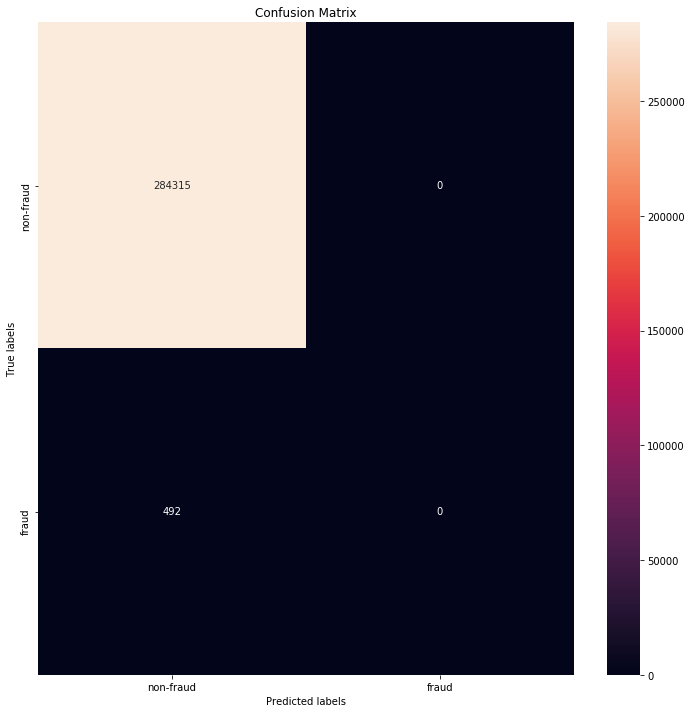

In [11]:
print_evaluations(y, ypred_bl, 'Baseline')

#### Compare it to a random forest classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, max_depth=3
                            , random_state=10)

In [13]:
# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [14]:
X_train.shape


(213605, 29)

In [15]:
X_test.shape

(71202, 29)

In [16]:
# Make predictions on the test data
ypred_rf = rf.predict(X_test)

How does model RandomForest score:
The accuracy of the model is: 0.999
The precision of the model is: 0.884
The recall of the model is: 0.628
The f1-score of the model is: 0.734
[[71071    10]
 [   45    76]]


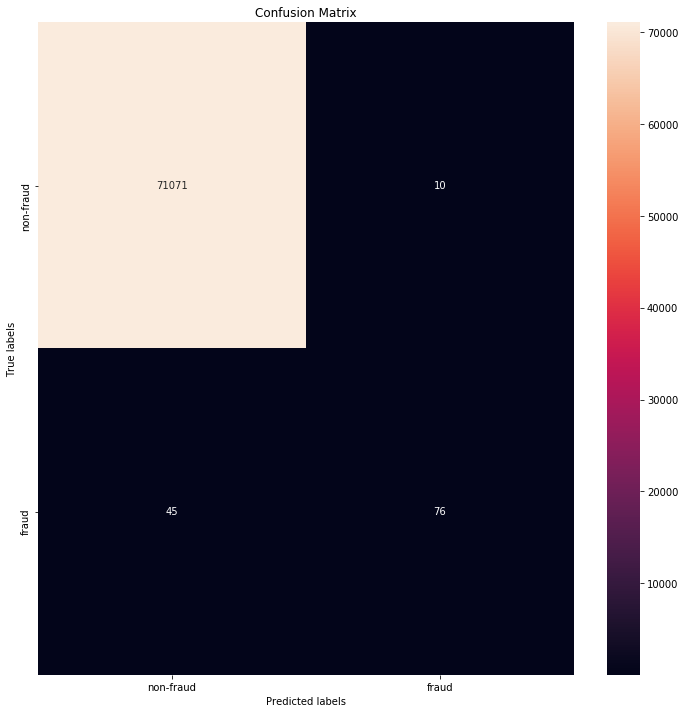

In [17]:
# Inspect the evaluators
print_evaluations(y_test, ypred_rf, 'RandomForest')

*recall = how much of the actual fradulent cases did I actually catch?*

### Use Undersampling

In [18]:
#!pip install imbalanced-learn

In [19]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [20]:
# Instantiate both resamplers
rus = RandomUnderSampler(sampling_strategy={0:20_000})
nm = NearMiss(sampling_strategy={0:20_000})

In [21]:
# Resample according to both resamplers
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_nm, y_nm = nm.fit_resample(X_train, y_train)

In [22]:
X_rus.shape, y_rus.shape

((20371, 29), (20371,))

How does model RandomUndersampling score:
The accuracy of the model is: 1.0
The precision of the model is: 0.891
The recall of the model is: 0.81
The f1-score of the model is: 0.848
[[71069    12]
 [   23    98]]


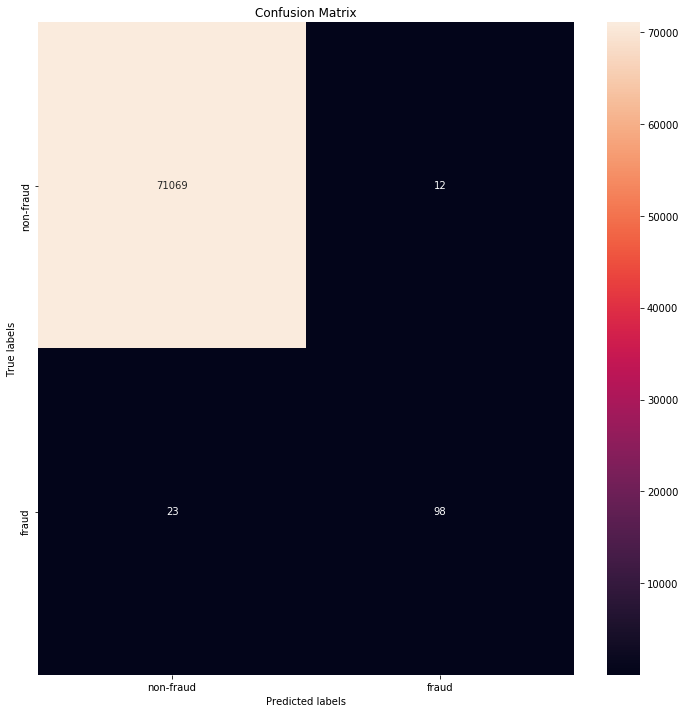

In [23]:
# Fit the random undersampling model, 
# make predictions and inspect evaluations
rf.fit(X_rus, y_rus)
ypred_rus = rf.predict(X_test)
print_evaluations(y_test, ypred_rus, 'RandomUndersampling')

How does model NearMiss score:
The accuracy of the model is: 0.952
The precision of the model is: 0.029
The recall of the model is: 0.851
The f1-score of the model is: 0.057
[[67663  3418]
 [   18   103]]


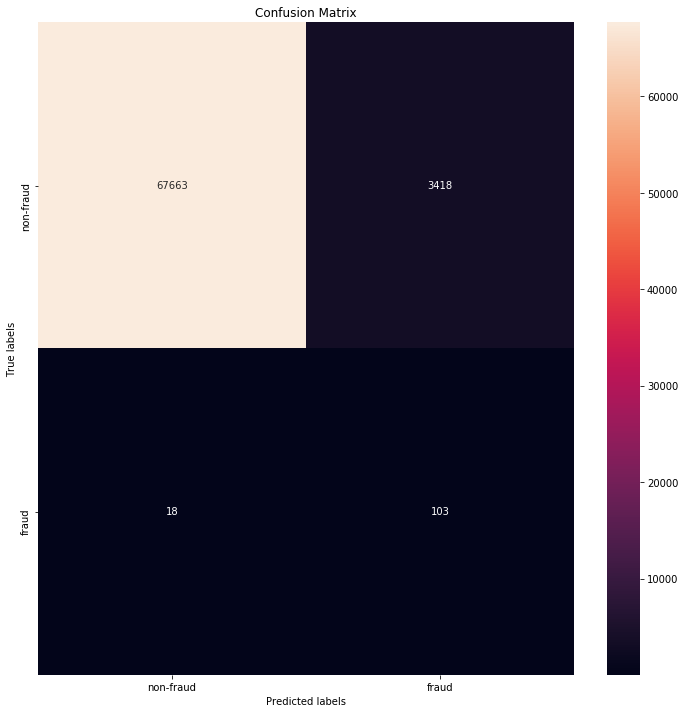

In [24]:
# Fit the Near Miss, 
# make predictions and inspect evaluations
rf.fit(X_nm, y_nm)
ypred_nm = rf.predict(X_test)
print_evaluations(y_test, ypred_nm, 'NearMiss')

### Use Oversampling

In [25]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [26]:
# RandomOverSampler Model
ros = RandomOverSampler(sampling_strategy={1: 2000})

In [27]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [28]:
np.unique(y_ros, return_counts=True)

(array([0, 1]), array([213234,   2000]))

How does model RandomOversampling score:
The accuracy of the model is: 0.999
The precision of the model is: 0.882
The recall of the model is: 0.744
The f1-score of the model is: 0.807
[[71069    12]
 [   31    90]]


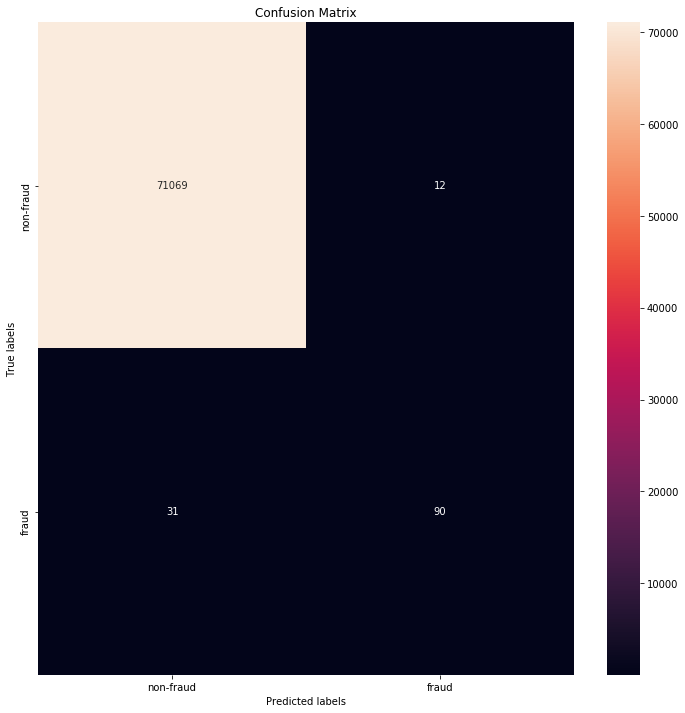

In [29]:
# Fit the RandomOverSampling, 
# make predictions and inspect evaluations
rf.fit(X_ros, y_ros)
ypred_ros = rf.predict(X_test)
print_evaluations(y_test, ypred_ros, 'RandomOversampling')

How does model SMOTE score:
The accuracy of the model is: 0.999
The precision of the model is: 0.888
The recall of the model is: 0.785
The f1-score of the model is: 0.833
[[71069    12]
 [   26    95]]


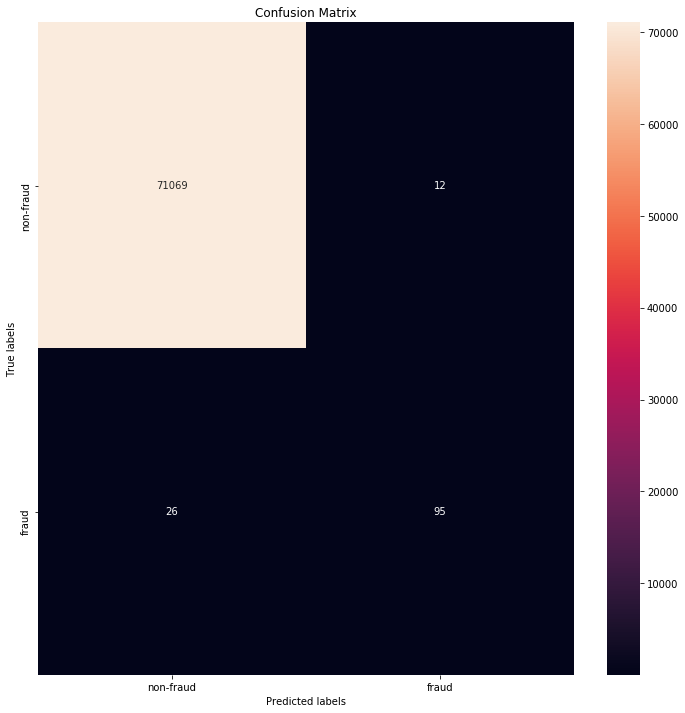

In [30]:
# Fit and run SMOTE
sm = SMOTE(sampling_strategy={1: 2000})
X_sm, y_sm = sm.fit_resample(X_train, y_train)

rf.fit(X_sm, y_sm)
ypred_sm = rf.predict(X_test)
print_evaluations(y_test, ypred_sm, 'SMOTE')